In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

In [ ]:
audio_path = '/content/drive/MyDrive/speech project/Umair_voice.wav'
output_path = '/content/drive/MyDrive/speech project/rain_clean_voice.wav'
y, sr = librosa.load(audio_path)

In [ ]:
D = librosa.stft(y)

energy = np.sum(np.abs(D)**2, axis=0)

energy_threshold = 0.06 * np.max(energy)

lowEnergyFrames=[]
low_energy_frames = np.where(energy < energy_threshold)[0]
for i in low_energy_frames:
    lowEnergyFrames.append(i)

mean_mag_signal = np.mean(np.abs(D), axis=1)
mean_mag_lowEnergy = np.mean(np.abs(D[:, lowEnergyFrames[:]]), axis=1)

D_denoised = np.abs(D) - mean_mag_signal[:, np.newaxis]-mean_mag_lowEnergy[:, np.newaxis]

D_denoised[D_denoised<0]=0

D_reconstructed = D_denoised * np.exp(1j * np.angle(D))

y_denoised = librosa.istft(D_reconstructed)

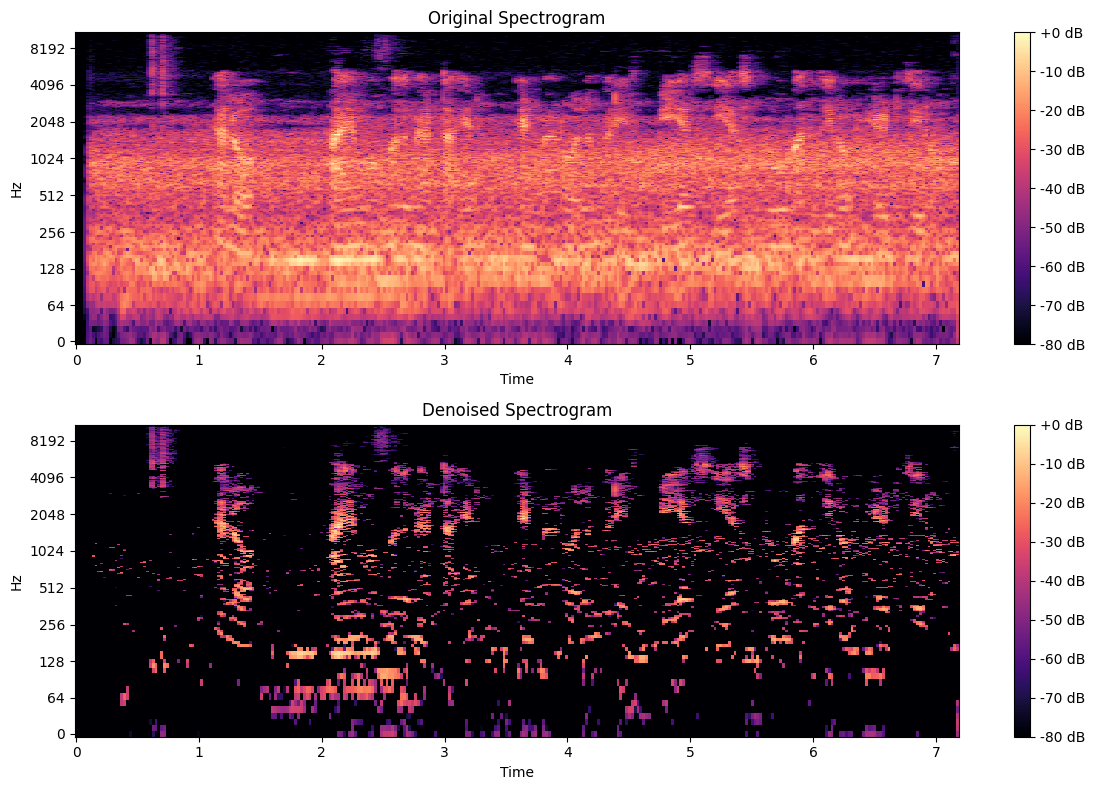

In [ ]:
sf.write(output_path, y_denoised, sr)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='log', x_axis='time')
plt.title('Original Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_reconstructed), ref=np.max), y_axis='log', x_axis='time')
plt.title('Denoised Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

input = Audio(filename=audio_path)
output = Audio(filename=output_path)

display(input,output)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
